In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

predictions_file = '/content/drive/MyDrive/final_predictions.csv'
df = pd.read_csv(predictions_file)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()

    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatizing text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

preprocessed_texts = [preprocess_text(doc) for doc in df['cleaned_text']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorizing preprocessed text data
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(preprocessed_texts)

# Applying NMF for topic modeling
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)

# Displaying topics with words
for index, topic in enumerate(nmf_model.components_):
    print(f'The top 15 words for topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


The top 15 words for topic #0
['help', 'know', 'good', 'really', 'dont', 'time', 'work', 'feel', 'year', 'ive', 'like', 'med', 'ra', 'pain', 'im']


The top 15 words for topic #1
['know', 'kind', 'definitely', 'welcome', 'glad', 'really', 'ill', 'hear', 'good', 'appreciate', 'reply', 'sharing', 'helpful', 'thats', 'thank']


The top 15 words for topic #2
['started', 'mg', 'hair', 'pill', 'nausea', 'methotrexate', 'injection', 'dose', 'taking', 'week', 'effect', 'mtx', 'folic', 'acid', 'day']


The top 15 words for topic #3
['ask', 'info', 'response', 'suggestion', 'hear', 'im', 'know', 'advice', 'look', 'great', 'sharing', 'ill', 'thats', 'appreciate', 'thanks']


The top 15 words for topic #4
['wishing', 'rant', 'diagnosed', 'decently', 'linked', 'peripheral', 'systemic', 'frequency', 'percentage', 'ulcerative', 'incidence', 'typed', 'reverse', 'people', 'deleted']




In [ ]:
# Transforming the TF-IDF vectorized texts into topic distribution
topic_distribution = nmf_model.transform(tfidf)

# Assigning each text to the topic with the highest weight
df['Dominant_Topic'] = topic_distribution.argmax(axis=1)


In [ ]:
for topic_idx in range(nmf_model.n_components):
    print(f"Sample texts for Topic #{topic_idx}:")
    sample_texts = df[df['Dominant_Topic'] == topic_idx].sample(n=5)['cleaned_text']
    for text in sample_texts:
        print(f" - {text}")
    print("\n")


Sample texts for Topic #0:
 - i've been on hydroxychloroquine for over 2 years. i got covid for the first time in august and was able to get paxlovid within the first 24 hrs. it helped me recover much faster, but the symptoms were still hell before they got better. the body/joint pain was so intense -- i honestly think that was the worst symptom for me. i couldn't get comfortable or be still because it was so bad-- it caused me a lot of mental distress because of this. very very difficult time falling asleep (i had to take sleep meds to knock me out). just awful. 

i've now been experiencing a long flare up ever since recovering. no new symptoms that would make me think there are new "long covid" issues, but i haven't felt this bad of a flare up for this long since before i got diagnosed 😭 it really, really sucks. 

as others have said, it's technically an immunosuppressant-- but it's not doing the same suppressing of your immune system as something like methotrexate or steroids would.

In [ ]:
topic_counts = df['Dominant_Topic'].value_counts()
topic_proportions = topic_counts / topic_counts.sum()


In [ ]:
import matplotlib.pyplot as plt


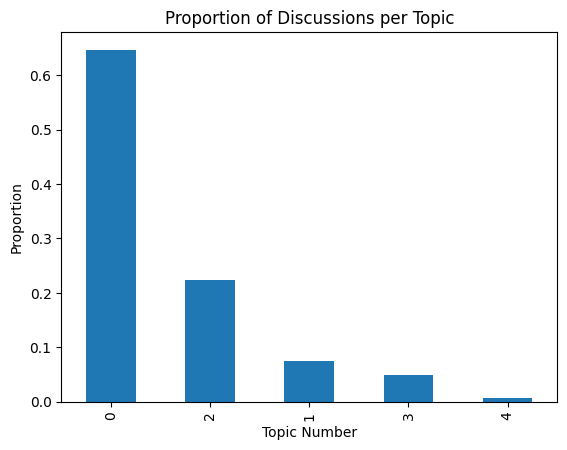

In [ ]:
#Plotting the proportion of discussions per topic
topic_proportions.plot(kind='bar')
plt.xlabel('Topic Number')
plt.ylabel('Proportion')
plt.title('Proportion of Discussions per Topic')
plt.show()


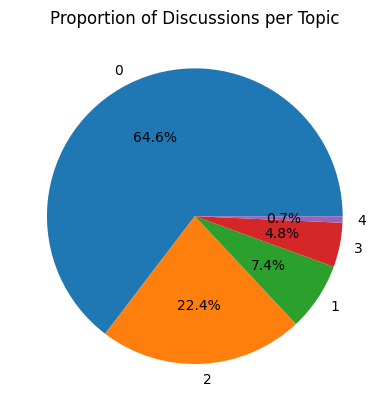

In [ ]:
topic_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Discussions per Topic')
plt.ylabel('')
plt.show()


In [ ]:
# Filtering the DataFrame for mentions of 'methotrexate' or 'mtx' in either the text or title columns
methotrexate_df = df[df['title'].str.contains('methotrexate|mtx', case=False, na=False) |
                      df['cleaned_text'].str.contains('methotrexate|mtx', case=False, na=False)]

In [ ]:
preprocessed_methotrexate_texts = [preprocess_text(doc) for doc in methotrexate_df['cleaned_text']]


In [ ]:
# Vectorizing the preprocessed Methotrexate-related texts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_methotrexate = tfidf_vectorizer.fit_transform(preprocessed_methotrexate_texts)

# Applying NMF for topic modeling
nmf_model_methotrexate = NMF(n_components=5, random_state=42)
nmf_model_methotrexate.fit(tfidf_methotrexate)

# Displaying topics with words
for index, topic in enumerate(nmf_model_methotrexate.components_):
    print(f'The top 15 words for Methotrexate Topic #{index}')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


The top 15 words for Methotrexate Topic #0
['really', 'dont', 'feel', 'medication', 'time', 'month', 'work', 'like', 'ive', 'med', 'ra', 'year', 'pain', 'methotrexate', 'im']


The top 15 words for Methotrexate Topic #1
['kind', 'rheum', 'know', 'im', 'interesting', 'reply', 'sharing', 'ill', 'response', 'appreciate', 'nice', 'hear', 'thats', 'helpful', 'thank']


The top 15 words for Methotrexate Topic #2
['5mg', 'help', '10', 'prescribed', 'typo', 'yes', 'methotrexate', 'mg', '10mg', 'daily', 'taking', '1mg', 'day', 'folic', 'acid']


The top 15 words for Methotrexate Topic #3
['time', 'issue', 'took', 'night', 'taking', 'tablet', 'stomach', 'drink', 'dose', 'nausea', 'pill', 'effect', 'injection', 'week', 'day']


The top 15 words for Methotrexate Topic #4
['stop', 'plaquenil', 'good', 'started', 'year', 'nausea', 'taking', 'ive', 'effect', 'im', 'humira', 'dose', 'loss', 'hair', 'mtx']




In [ ]:
# Transforming the TF-IDF vectorized texts into topic distribution
topic_distributions = nmf_model.transform(tfidf)

# Assigning each text to the topic with the highest weight
df['Dominant_Topic'] = topic_distribution.argmax(axis=1)


In [ ]:
for topic_idx in range(nmf_model.n_components):
    print(f"Sample texts for Topic #{topic_idx}:")
    sample_texts = df[df['Dominant_Topic'] == topic_idx].sample(n=5)['cleaned_text']
    for text in sample_texts:
        print(f" - {text}")
    print("\n")

Sample texts for Topic #0:
 - hey all, i’ve been a lurker for a while but feel the need to post as i feel lost and so alone. 

i am a 42yr old male who was diagnosed in jan of 2022 with ra. it was clearly present for years prior but i had awful doctors.

been on mtx this whole time (injection) and while better my flares have gotten worse, prednisone doesn’t seem to anything but make me eat like a beast. 

i start humira tomorrow in combination with my mtx and i’m excited. as well as seeing a new dr in july.

my issue is i’m just absolutely angry all the time, this pain and lack of strength isn’t supposed to happen at 42. i’m in good shape and i can’t do what i need to to live how i want and where i live. i honestly want to cry and live in a hole (which i never do) 24/7. my focus just isn’t what it used to be and my career depends on it.

how is this my life, how am i this weak and in pain daily. if this is how things will continue i just can’t imagine. my family unjustly takes the brun

In [ ]:
!pip install gensim


In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import gensim


In [ ]:
# Tokenizing each preprocessed document
tokenized_texts = [text.split() for text in preprocessed_methotrexate_texts]


In [ ]:
# Creating a Dictionary from the tokenized texts
dictionary = corpora.Dictionary(tokenized_texts)

# Creating a corpus from the Dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


In [ ]:
# Applying LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Printing the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.015*"side" + 0.013*"effect" + 0.010*"also" + 0.009*"methotrexate" + 0.009*"take" + 0.009*"day" + 0.009*"pain" + 0.008*"month" + 0.008*"mtx" + 0.008*"med"


Topic: 1 
Words: 0.021*"im" + 0.011*"methotrexate" + 0.011*"like" + 0.011*"mtx" + 0.010*"ive" + 0.008*"also" + 0.008*"work" + 0.007*"get" + 0.007*"pain" + 0.007*"day"


Topic: 2 
Words: 0.014*"im" + 0.010*"ive" + 0.008*"started" + 0.008*"year" + 0.008*"month" + 0.007*"got" + 0.007*"try" + 0.007*"also" + 0.007*"take" + 0.007*"mtx"


Topic: 3 
Words: 0.027*"take" + 0.024*"day" + 0.015*"mtx" + 0.014*"acid" + 0.014*"folic" + 0.012*"also" + 0.011*"methotrexate" + 0.011*"thank" + 0.010*"taking" + 0.009*"year"


Topic: 4 
Words: 0.024*"im" + 0.014*"methotrexate" + 0.011*"mtx" + 0.011*"year" + 0.011*"ive" + 0.010*"take" + 0.010*"day" + 0.009*"side" + 0.009*"effect" + 0.009*"week"




In [ ]:
# Fitting TF-IDF to the preprocessed texts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Fitting NMF model
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)


NMF(n_components=5, random_state=42)

In [ ]:
def get_nmf_top_words(model, feature_names, num_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        # Ensuring indices do not go out of bounds
        top_indices = topic.argsort()[-num_top_words:]
        top_indices = [index for index in top_indices if index < len(feature_names)]
        top_words[f"Topic {topic_idx}"] = [feature_names[i] for i in top_indices]
    return top_words

nmf_top_words = get_nmf_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 5)


In [ ]:
# Getting top words for each topic in an LDA model

def get_lda_top_words(model, dictionary, num_top_words):
    top_words = {}
    for topic_idx in range(model.num_topics):

        top_words[f"Topic {topic_idx}"] = [dictionary[id] for id, _ in model.get_topic_terms(topic_idx, num_top_words)]
    return top_words

lda_top_words = get_lda_top_words(lda_model, dictionary, 5)



In [ ]:
# Creating a DataFrame for comparing top words between NMF and LDA topic models

comparison_df = pd.DataFrame({'NMF Top Words': pd.Series(nmf_top_words), 'LDA Top Words': pd.Series(lda_top_words)})


In [ ]:
# Combining the top words from both models into a DataFrame

topics_df = pd.DataFrame({
    'Topic': [f"Topic {i}" for i in range(len(nmf_top_words))],
    'Top Words NMF': ['; '.join(words) for words in nmf_top_words.values()],
    'Top Words LDA': ['; '.join(words) for words in lda_top_words.values()]
})

print(topics_df)


     Topic                               Top Words NMF  \
0  Topic 0                     like; med; ra; pain; im   
1  Topic 1       reply; sharing; helpful; thats; thank   
2  Topic 2               effect; mtx; folic; acid; day   
3  Topic 3     sharing; ill; thats; appreciate; thanks   
4  Topic 4  incidence; typed; reverse; people; deleted   

                            Top Words LDA  
0  side; effect; also; methotrexate; take  
1        im; methotrexate; like; mtx; ive  
2           im; ive; started; year; month  
3             take; day; mtx; acid; folic  
4        im; methotrexate; mtx; year; ive  


In [ ]:
# calculating the reconstruction error for the NMF model
reconstruction_error = nmf_model.reconstruction_err_
print(f'Reconstruction Error (NMF): {reconstruction_error}')


Reconstruction Error (NMF): 68.79189182203413


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel, LdaModel
from gensim import corpora


# Vectorizing preprocessed text data
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(preprocessed_texts)

# Applying LDA for topic modeling
num_topics = 5
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10
)

# Evaluating LDA model coherence
coherence_lda = CoherenceModel(
    model=lda_model,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

# Printing coherence score
print(f'Coherence Score (LDA): {coherence_lda}')

# Printing perplexity for LDA
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplexity Score (LDA): {perplexity_lda}')


Coherence Score (LDA): 0.43336209442687473
Perplexity Score (LDA): -7.373963466613449


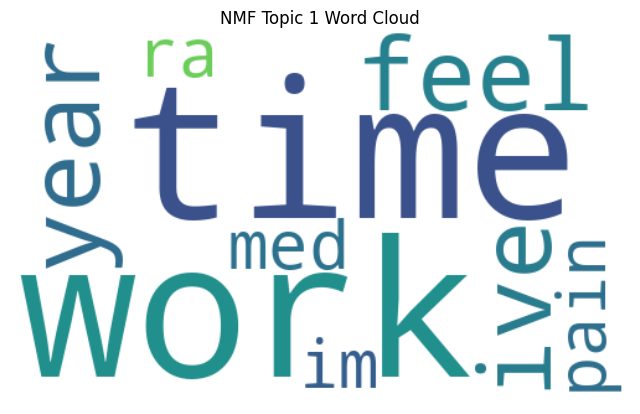

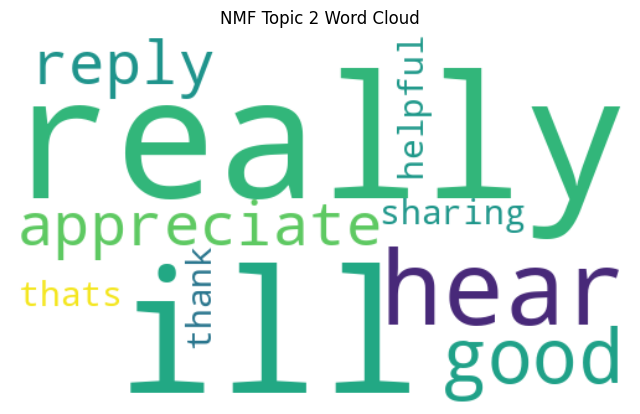

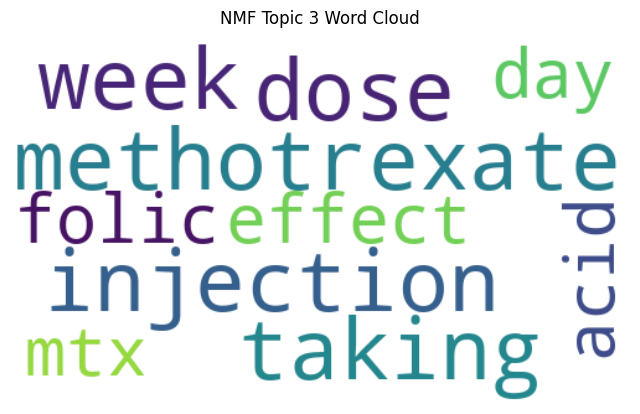

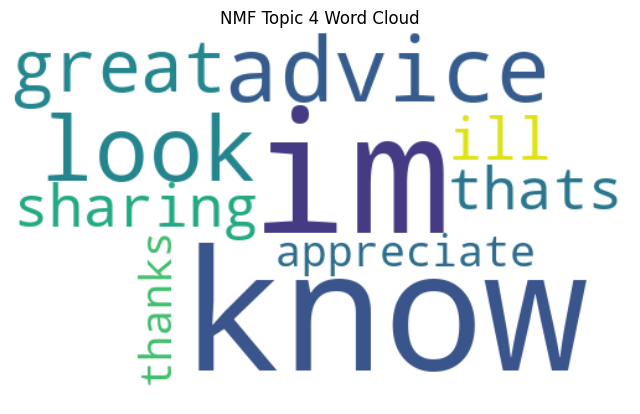

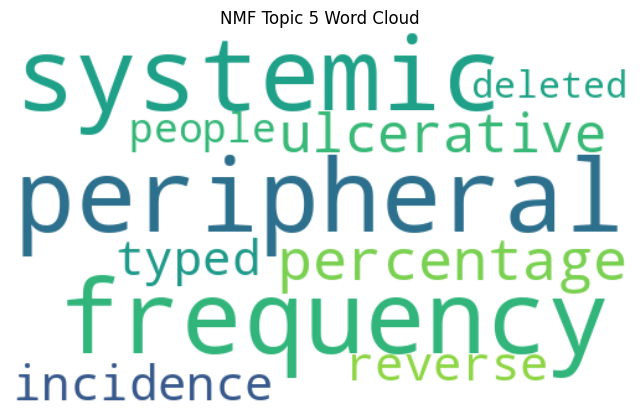

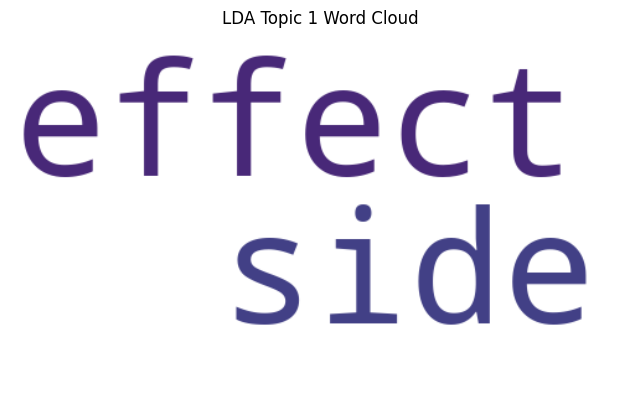

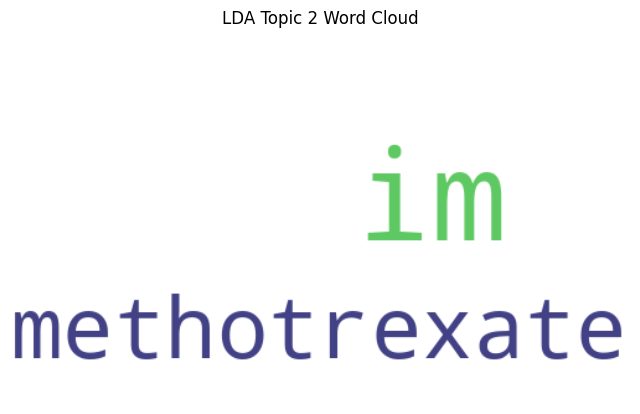

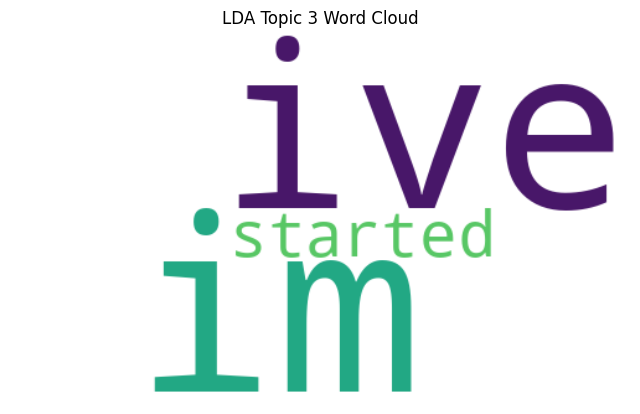

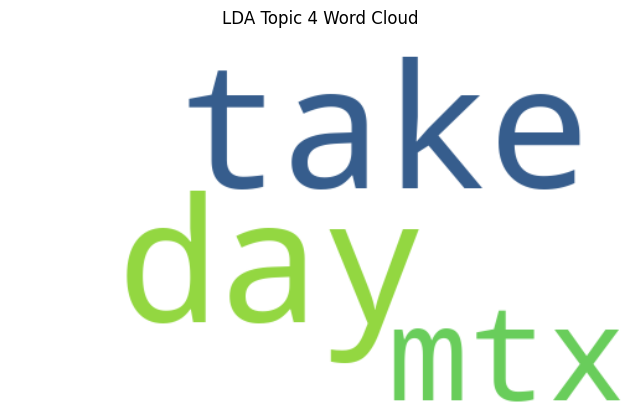

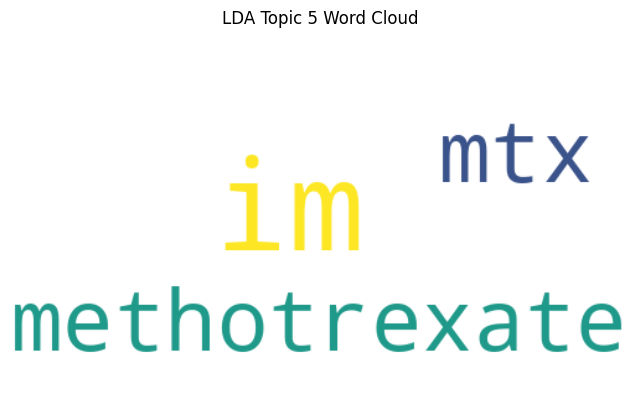

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(top_words, title):
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(' '.join(top_words))

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plotting word clouds for NMF topics
for i, topic_words_nmf in enumerate(nmf_top_words):
    plot_word_cloud(topic_words_nmf, f'NMF Topic {i + 1} Word Cloud')

# Plotting word clouds for LDA topics
for i, topic_words_lda in enumerate(lda_top_words):
    plot_word_cloud(topic_words_lda, f'LDA Topic {i + 1} Word Cloud')



In [ ]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Getting the dominant topic for each document
dominant_topics = [max(lda_model.get_document_topics(doc), key=lambda x: x[1]) for doc in corpus]

# Extracting sample texts for each dominant topic
num_topics = 5
sample_texts_by_topic = {}
for topic_id in range(num_topics):
    topic_texts = [doc for i, doc in enumerate(tokenized_texts) if dominant_topics[i][0] == topic_id]
    sample_texts_by_topic[f'Topic #{topic_id}'] = topic_texts[:5]



In [ ]:
# Printing sample texts for each dominant topic
for topic_id, sample_texts in sample_texts_by_topic.items():
    print(f'Topic #{topic_id}')
    for i, text in enumerate(sample_texts):
        print(f"Sample Text {i + 1}: {text}")
    print('\n')


Topic #Topic #0
Sample Text 1: ['month', 'since', 'started', 'get', 'try', 'puke', 'monday', 'thats', 'day', 'take', 'eventually', 'get', 'past', 'nauseous', 'stand', 'tuesday', 'step', 'away', 'coffee', 'wednesday', 'lot', 'standing', 'life', 'really', 'like', 'coffee', 'id', 'like', 'hope', 'month', 'tuesday', 'wednesday', 'board', 'help', 'get']
Sample Text 2: []
Sample Text 3: ['ive', 'actually', 'never', 'felt', 'nausea', 'methotrexate', 'liver', 'function', 'fluctuating', 'actually', 'dosage', 'lowered', '6', 'pill', 'weekly', 'honestly', 'vary', 'person', 'person', 'also', 'take', 'med', 'night', 'weekend']
Sample Text 4: ['took', '3', 'year', 'never', 'got', 'rid', 'nausea', 'wasnt', 'helping', 'symptom', 'clinical', 'test', 'result', 'stopped', 'september', 'robitussin', 'dm', 'morning', 'took', 'helped', 'blah', 'feeling', 'maybe', 'could', 'trying']
Sample Text 5: ['im', 'curious', 'dosage', 'started', 'taking', 'mtx', '10mg', 'week', 'havent', 'nausea', 'also', 'take', '1mg